In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import plotly.graph_objects as go
import glob


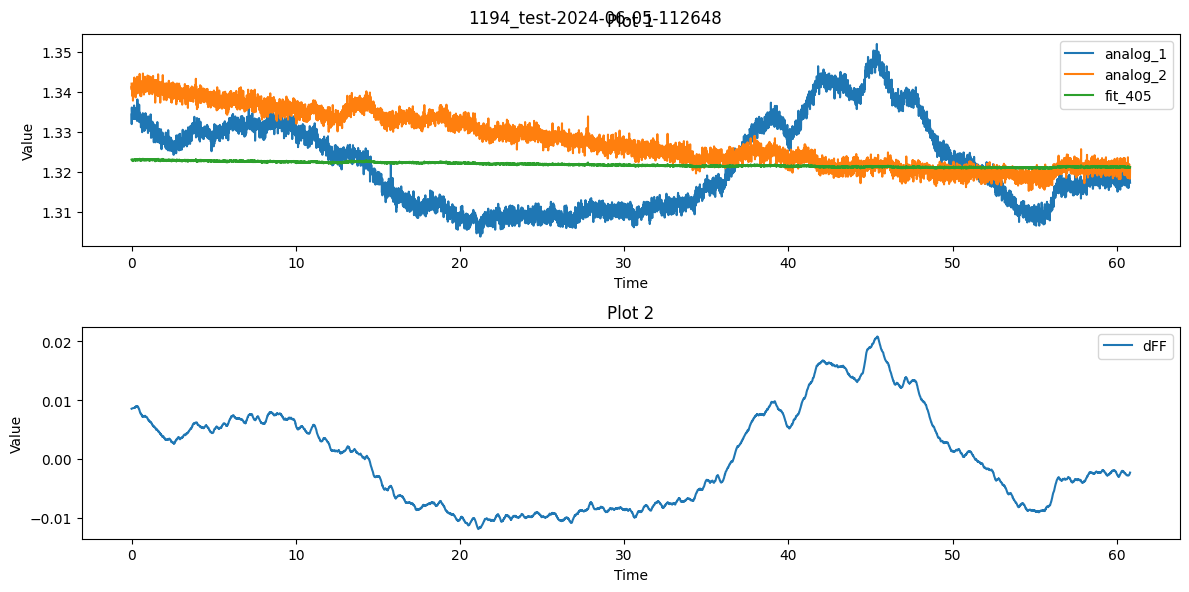

In [6]:
# Define the PPD file path
ppd_file_path = r'H:\fp_test\1194_test-2024-06-05-112648.ppd'
#ppd_file_path = r'H:\fp_test\1195_test-2024-06-05-113638.ppd'
#ppd_file_path = r'H:\fp_test\1196_test-2024-06-05-114030.ppd'

# Extract the filename without the extension
filename = os.path.splitext(os.path.basename(ppd_file_path))[0]

# Load the data from the CSV file
data = import_ppd(ppd_file_path, low_pass=20, high_pass=0.001)

# Convert sample index to time vector
time = np.arange(len(data['analog_1'])) / 130

# http://dx.doi.org/10.1016/j.cell.2015.07.014
# dFF using 405 fit as baseline
reg= np.polyfit(data['analog_2'], data['analog_1'], 1) # ch1 is 465nm, ch2 is 405nm 
fit_405=reg[0]*data['analog_2']+reg[1]
dFF=(data['analog_1']-fit_405)/fit_405 #this gives deltaF/F
data['fit_405']=fit_405
data['dFF']=dFF

# Apply Savitzky-Golay filter to smooth dFF
smoothed_dFF = savgol_filter(dFF, window_length=51, polyorder=3)

# Create the figure and subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))

# Plot 1
ax1.plot(time, data['analog_1'], label='analog_1')
ax1.plot(time, data['analog_2'], label='analog_2')
ax1.plot(time, data['fit_405'], label='fit_405')

# Set plot 1 properties
ax1.set_xlabel('Time')
ax1.set_ylabel('Value')
ax1.set_title('Plot 1')
ax1.legend()

# Plot 2
ax2.plot(time, smoothed_dFF, label='dFF')

# Set plot 2 properties
ax2.set_xlabel('Time')
ax2.set_ylabel('Value')
ax2.set_title('Plot 2')
ax2.legend()

# Adjust spacing between subplots
plt.tight_layout()

# Set the figure title
fig.suptitle(filename)

# Save the figure as PNG with 300 dpi
save_path = os.path.join(os.path.dirname(ppd_file_path), filename + '.png')
fig.savefig(save_path, dpi=300)

# Display the plots
plt.show()

# Create the plot
fig = go.Figure()

# Add a trace
fig.add_trace(go.Scatter(x=time, y=smoothed_dFF, mode='lines', name='dFF'))

# Customize the layout
fig.update_layout(
    title='Interactive dFF Plot',
    xaxis_title='Time (s)',
    yaxis_title='dFF',
    template='plotly_dark'
)

#save_path_plotly = os.path.join(os.path.dirname(ppd_file_path), filename + '_plotly.png')
#fig.write_image(save_path_plotly, format='png', scale=5)

# Show the plot
fig.show()


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import plotly.graph_objects as go
import glob

def import_ppd(file_path, low_pass, high_pass):
    # Placeholder function for loading .ppd data
    # Replace with actual data loading code
    # Example structure of the data dictionary:
    # data = {
    #     'analog_1': np.array(...),
    #     'analog_2': np.array(...)
    # }
    pass

# Define the folder containing the .ppd files
folder_path = r'H:\fp_test'

# List all .ppd files in the folder
ppd_files = glob.glob(os.path.join(folder_path, '*.ppd'))

for ppd_file_path in ppd_files:
    # Extract the filename without the extension
    filename = os.path.splitext(os.path.basename(ppd_file_path))[0]

    # Load the data from the CSV file
    data = import_ppd(ppd_file_path, low_pass=20, high_pass=0.001)

    # Convert sample index to time vector
    time = np.arange(len(data['analog_1'])) / 130

    # http://dx.doi.org/10.1016/j.cell.2015.07.014
    # dFF using 405 fit as baseline
    reg = np.polyfit(data['analog_2'], data['analog_1'], 1) # ch1 is 465nm, ch2 is 405nm 
    fit_405 = reg[0] * data['analog_2'] + reg[1]
    dFF = (data['analog_1'] - fit_405) / fit_405 # this gives deltaF/F
    data['fit_405'] = fit_405
    data['dFF'] = dFF

    # Apply Savitzky-Golay filter to smooth dFF
    smoothed_dFF = savgol_filter(dFF, window_length=51, polyorder=3)

    # Create the figure and subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))

    # Plot 1
    ax1.plot(time, data['analog_1'], label='analog_1')
    ax1.plot(time, data['analog_2'], label='analog_2')
    ax1.plot(time, data['fit_405'], label='fit_405')

    # Set plot 1 properties
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Value')
    ax1.set_title('Plot 1')
    ax1.legend()

    # Plot 2
    ax2.plot(time, smoothed_dFF, label='dFF')

    # Set plot 2 properties
    ax2.set_xlabel('Time')
    ax2.set_ylabel('Value')
    ax2.set_title('Plot 2')
    ax2.legend()

    # Adjust spacing between subplots
    plt.tight_layout()

    # Set the figure title
    fig.suptitle(filename)

    # Save the figure as PNG with 300 dpi
    save_path = os.path.join(os.path.dirname(ppd_file_path), filename + '.png')
    fig.savefig(save_path, dpi=300)

    # Display the plots
    plt.show()

    # Create the plot
    fig = go.Figure()

    # Add a trace
    fig.add_trace(go.Scatter(x=time, y=smoothed_dFF, mode='lines', name='dFF'))

    # Customize the layout
    fig.update_layout(
        title='Interactive dFF Plot',
        xaxis_title='Time (s)',
        yaxis_title='dFF',
        template='plotly_dark'
    )

    #save_path_plotly = os.path.join(os.path.dirname(ppd_file_path), filename + '_plotly.png')
    #fig.write_image(save_path_plotly, format='png', scale=5)

    # Show the plot
    fig.show()
